In [8]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
RPS_data = tfds.load('rock_paper_scissors', split='train')

2023-12-05 15:49:50.419029: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 15:49:52.743069: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 15:49:52.743239: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 15:49:53.071277: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 15:49:53.775016: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 15:49:53.776492: I tensorflow/core/platform/cpu_feature_guard.cc:1

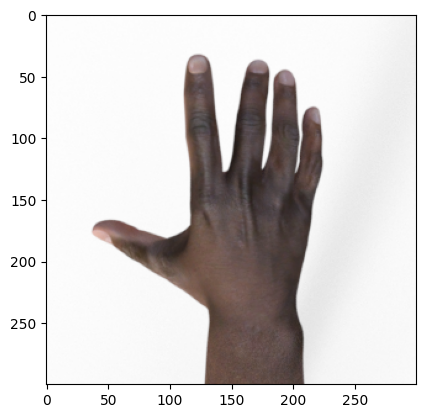

Label: 1
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


In [27]:
#Show image
for ex in RPS_data:
    if ex["label"] == 1:
        example = np.array(ex["image"])
        answer = np.array(ex["label"])
        break

plt.imshow(example)
plt.show()
print(f"Label: {answer}")

print(f"#Examples: {len(RPS_data)}")
print(f"Shape Data: {tf.shape(example)}")
print(f"Shape Data: {tf.shape(answer)}")

In [ ]:
# 0: Rock
# 1: Paper
# 2: Scissors

In [17]:
x = []
y = []

for ex in RPS_data:
    x.append(ex["image"])
    y.append(ex["label"])

In [18]:
x,y = np.array(x),np.array(y)

In [23]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([840, 840, 840]))

In [24]:
y = tf.keras.utils.to_categorical(y)

In [25]:
y[0]

array([0., 0., 1.], dtype=float32)